In [62]:
#
# libraries
#
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import probplot
import matplotlib.pyplot as plt
#

In [3]:
#
# load the data
#
my_data = pd.read_csv('Datasets\\Metro_Interstate_Traffic_Volume.csv')
my_data = my_data.loc[my_data.date_time > '2018-08-31', :]
my_data.reset_index(drop = True, inplace = True)
print(my_data.head())
print(my_data.shape)
#

  holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0    None  294.76     0.25      0.0          75          Rain   
1    None  294.61     0.25      0.0          75          Rain   
2    None  294.54     0.25      0.0          90          Rain   
3    None  294.54     0.25      0.0          90  Thunderstorm   
4    None  294.04     1.40      0.0          90          Rain   

      weather_description            date_time  traffic_volume  
0              light rain  2018-08-31 00:00:00             764  
1              light rain  2018-08-31 01:00:00             456  
2              light rain  2018-08-31 02:00:00             358  
3  proximity thunderstorm  2018-08-31 02:00:00             358  
4           moderate rain  2018-08-31 03:00:00             378  
(968, 9)


In [4]:
#
# convert date_time to integers
#
my_data.date_time = pd.to_datetime(my_data.date_time)
my_data['int_time'] = (my_data.date_time - my_data.date_time[0]).astype(np.int64) / 1e9
#

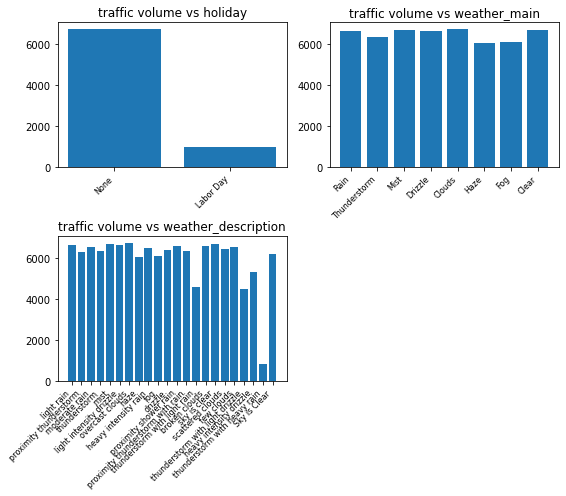

In [44]:
#
# plot the traffic volumes vs. the categorical variables
#
cat_vars = ['holiday', 
            'weather_main',
            'weather_description']
rows = int(np.ceil(len(cat_vars) / 2))
cols = 2
fig, ax = plt.subplots(rows, cols, figsize = (8, 7))
count = 0
for row in range(rows):
    for col in range(cols):
        if count < len(cat_vars):
            plot_data = \
                (my_data.loc[:, [cat_vars[count]] + 
                                ['traffic_volume']].
                 groupby(cat_vars[count]).mean())
            ax[row, col].bar(my_data[cat_vars[count]], 
                             my_data['traffic_volume'])
            ax[row, col].set_title('traffic volume vs '+ 
                                   cat_vars[count])
            ax[row, col].set_xticks(range(len(my_data[cat_vars[count]].
                                              unique())))
            ax[row, col].set_xticklabels(my_data[cat_vars[count]].
                                         unique(),
                                         rotation = 45, 
                                         size = 8, 
                                         ha = 'right')
            count += 1
        else:
#
# remove any unused axes
#
            fig.delaxes(ax[row, col])
plt.tight_layout()
plt.show()
#

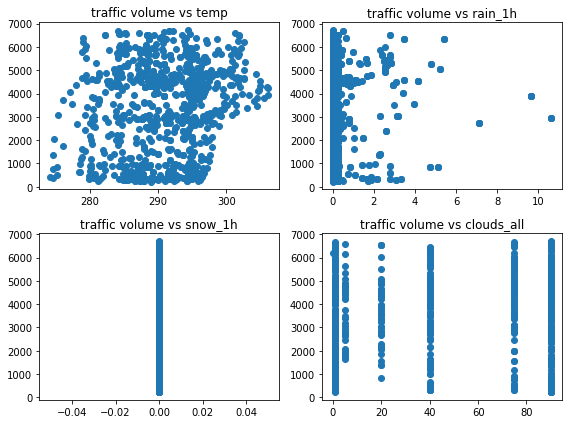

In [45]:
#
# plot traffic volume vs. selected numeric variables
#
num_vars = list(my_data.describe().columns)
num_vars = [num_vars[i] 
            for i in range(len(num_vars))
           if num_vars[i] not in  ['traffic_volume',
                                   'date_time',
                                   'int_time']]
rows = int(np.ceil(len(num_vars) / 2))
cols = 2
fig, ax = plt.subplots(rows, cols, figsize = (8, 6))
count = 0
for row in range(rows):
    for col in range(cols):
        if count < len(num_vars):
            ax[row, col].scatter(my_data[num_vars[count]], 
                                 my_data['traffic_volume'])
            ax[row, col].set_title('traffic volume vs '+ 
                                   num_vars[count])
            count += 1
        else:
#
# remove any unused axes
#
            fig.delaxes(ax[row, col])
plt.tight_layout()
plt.show()
#

In [46]:
#
# drop 'snow' as it is not provding any information
# create dummy vars for the categorical variables
num_vars = [num_vars[i] 
            for i in range(len(num_vars))
           if num_vars[i] != 'snow_1h']
model_data = pd.concat([my_data.loc[:, num_vars + ['int_time']],
                        pd.get_dummies(my_data.loc[:, cat_vars])], 
                       axis = 1)
model_data.head()
#

,temp,rain_1h,clouds_all,int_time,holiday_Labor Day,holiday_None,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,...,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_sky is clear,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain
0,294.76,0.25,75,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,294.61,0.25,75,3600.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,294.54,0.25,90,7200.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,294.54,0.25,90,7200.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,294.04,1.40,90,10800.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#
y = my_data.traffic_volume
mls_model = OLS()
mls_model.fit(model_data, y)
print(mls_model.coef_)
print(mls_model.intercept_)
print(mls_model.score(model_data, y))
#

[ 8.27936773e+01  1.23720714e+01  8.25196608e+00  4.17553926e-04
 -6.97245577e+02  6.97245578e+02  1.08786701e+03  2.46037586e+01
  3.06313660e+02 -2.57506459e+02 -2.98144206e+02 -2.09165922e+02
  4.80612429e+01 -7.02029087e+02  2.52845633e+03  2.38788198e+02
 -4.06271139e+02  7.09318264e+01 -2.57506459e+02 -2.98144206e+02
  1.19834748e+03  1.50177878e+02 -4.85762684e+02 -6.24466384e+02
 -2.09165922e+02 -2.45963831e+02 -3.88937455e+02  7.68313580e+02
  7.45203887e+02  2.46047307e+03  1.03821186e+02 -1.44058932e+03
 -1.16769699e+03 -2.59254554e+03 -6.03660704e+02  4.56197190e+02]
-22174.315956855127
0.12478430548635289


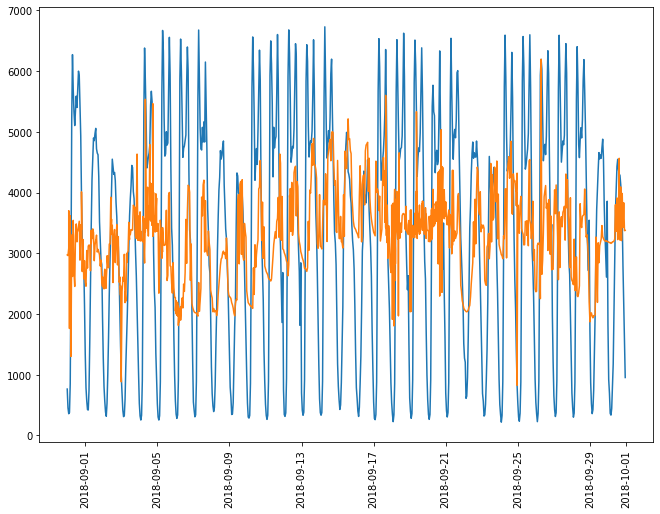

In [50]:
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.plot(my_data.date_time, my_data.traffic_volume)
ax.plot(my_data.date_time, mls_model.predict(model_data))
plt.xticks(rotation = 90)
plt.show()
#

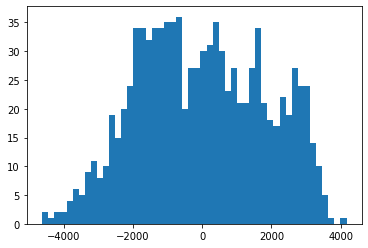

In [51]:
#
residuals = pd.Series(mls_model.predict(model_data) - 
                      my_data.traffic_volume)
fig, ax = plt.subplots()
ax.hist(residuals, bins = 50)
plt.show()
#

In [52]:
#
# add a sin and cos function of time since we see what appears to be
# a one-day cycle
# the general formula is sin(2 * pi * t / period)
# since our data are in seconds, divide tiem by 24 * 60 * 60
# to equate to a one-day period
#
model_data['sin_t'] = np.sin(2 * np.pi * model_data.int_time / 24 * 60 * 60)
model_data['cos_t'] = np.cos(2 * np.pi * model_data.int_time / 24 * 60 * 60)
model_data.columns
#

Index(['temp', 'rain_1h', 'clouds_all', 'int_time', 'holiday_Labor Day',
       'holiday_None', 'weather_main_Clear', 'weather_main_Clouds',
       'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze',
       'weather_main_Mist', 'weather_main_Rain', 'weather_main_Thunderstorm',
       'weather_description_Sky is Clear', 'weather_description_broken clouds',
       'weather_description_drizzle', 'weather_description_few clouds',
       'weather_description_fog', 'weather_description_haze',
       'weather_description_heavy intensity drizzle',
       'weather_description_heavy intensity rain',
       'weather_description_light intensity drizzle',
       'weather_description_light rain', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_proximity shower rain',
       'weather_description_proximity thunderstorm',
       'weather_description_proximity thunderstorm with rain',
       'w

In [53]:
#
mls_model = OLS()
mls_model.fit(model_data, y)
print(mls_model.coef_)
print(mls_model.intercept_)
print(mls_model.score(model_data, y))
#

[ 8.28107060e+01  1.26203181e+01  8.24244476e+00  4.16119259e-04
 -6.97387245e+02  6.98766953e+02  1.08783803e+03  2.57821067e+01
  3.09441993e+02 -2.56720403e+02 -2.97212300e+02 -2.09226521e+02
  4.79290225e+01 -7.04005980e+02  2.52995418e+03  2.38673502e+02
 -4.08722147e+02  6.93224499e+01 -2.56638961e+02 -2.97171879e+02
  1.20813202e+03  1.49979216e+02 -4.89938931e+02 -6.24210865e+02
 -2.09181472e+02 -2.45363958e+02 -3.90161106e+02  7.68686285e+02
  7.47710563e+02  2.46234291e+03  1.02136808e+02 -1.44012818e+03
 -1.16760215e+03 -2.59886213e+03 -6.05777639e+02  4.58118019e+02
 -4.44455705e+07 -2.34378006e+01]
-22157.430291953508
0.12479213645488285


In [56]:
#
# scale the data then fit a RandomForest model
#
scaler = StandardScaler()
scaled_model_X = scaler.fit_transform(model_data)
RF = RandomForestRegressor(random_state = 42)
RF = RF.fit(scaled_model_X, my_data.traffic_volume)
RF.score(scaled_model_X, my_data.traffic_volume)
#

0.9481262295271707

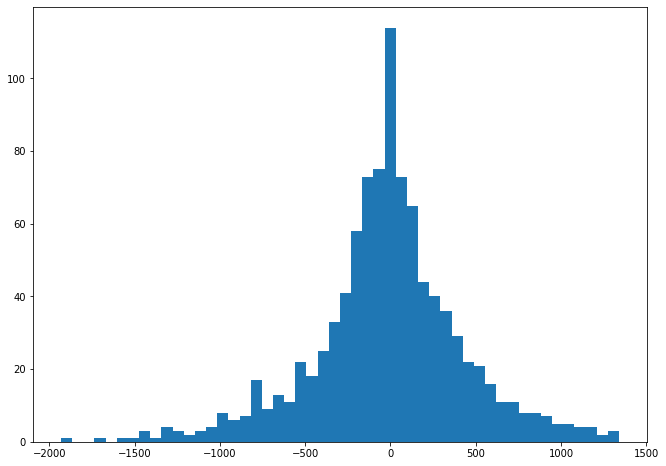

In [58]:
#
residuals = pd.Series(RF.predict(scaled_model_X) -
                      my_data.traffic_volume)
fig, ax = plt.subplots(figsize = (11, 8))
ax.hist(residuals, bins = 50)
plt.show()
#

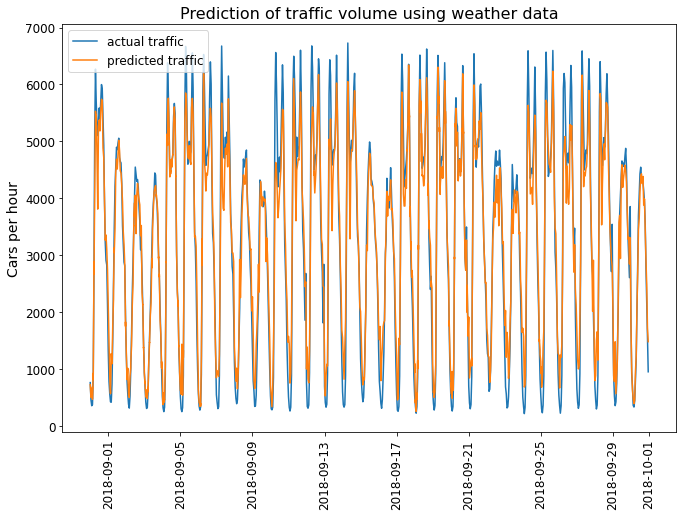

In [60]:
#
fig, ax = plt.subplots(figsize = (11, 7.5))
ax.plot(my_data.date_time, my_data.traffic_volume, 
        label = 'actual traffic')
ax.plot(my_data.date_time, RF.predict(scaled_model_X),
        label = 'predicted traffic')
ax.legend(fontsize = 12)
ax.set_ylabel('Cars per hour', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Prediction of traffic volume using weather data', 
             fontsize = 16)
plt.xticks(rotation = 90)
plt.show()
#

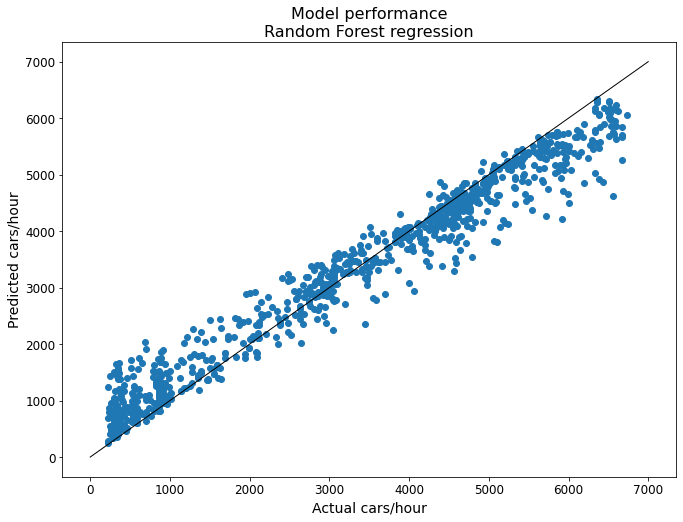

In [61]:
#
# plot the predicted vs. actual values
#
fig, ax = plt.subplots(figsize = (11, 8))
ax.scatter(my_data.traffic_volume,
           RF.predict(scaled_model_X))
ax.plot([0, 7000], [0, 7000], color = 'black', lw = 1)
ax.set_xlabel('Actual cars/hour', fontsize = 14)
ax.set_ylabel('Predicted cars/hour', fontsize = 14)
ax.set_title('Model performance\nRandom Forest regression', fontsize = 16)
plt.tick_params(labelsize = 12)
plt.show()
#

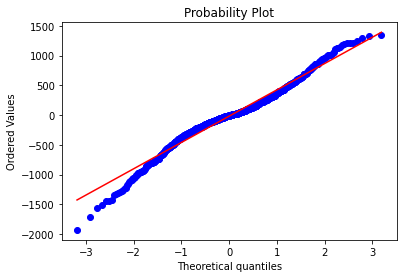

In [63]:
residuals = RF.predict(scaled_model_X) - my_data.traffic_volume
probplot(residuals, plot = plt)
plt.show()